<a href="https://colab.research.google.com/github/troncosofranco/ML-Notebooks/blob/main/K_means_Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Introduciton

K-means clustering is a type of unsupervised learning algorithm used in machine learning, whose main objective is to categorize or cluster distinct entities into 'k' groups based on attribute similarities. The 'k' in K-means denotes the number of clusters the algorithm will identify and is defined by the user.

The K-means algorithm works in an iterative way. Here is a simplified explanation of the steps:

1. **Initialization:** 'k' number of centroids (which are the center points of clusters) are randomly assigned.

2. **Assignment:** Each data point is assigned to the nearest centroid, which results in 'k' groups of data points. The distance between the data points and centroids is generally measured using Euclidean or Manhattan distance.

3. **Update:** After all the points have been assigned, the position of the 'k' centroids is recalculated. This is done by taking the mean of all the data points in the cluster—hence the name "K-means".

4. **Iteration:** Steps 2 and 3 are repeated until the centroids no longer move significantly, or a set number of iterations has been reached.

###Benefits of K-means Clustering

1. **Efficiency:** K-means is computationally efficient compared to other clustering algorithms, especially on large datasets.

2. **Ease of implementation:** The algorithm is straightforward and easy to understand, making it a good choice for people new to machine learning.

3. **Scalability:** The algorithm scales well with the increase in the size of the dataset.

4. **Versatility:** K-means can be applied to a wide range of problem domains, including image recognition, market segmentation, and data compression.

5. **Feature space:** K-means works well in a high dimensional feature space.

However, K-means clustering also has some limitations. It assumes spherical clusters and may perform poorly if clusters are of different shapes. The algorithm is also sensitive to the initial choice of centroids and may fall into local minima. This can be mitigated by running the algorithm multiple times with different starting conditions. 

#1. Import Modules

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Load Data

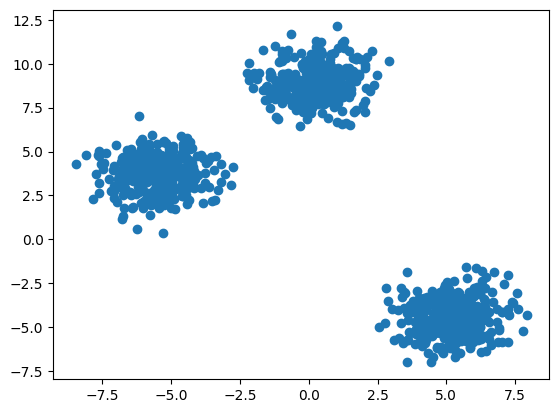

In [ ]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)
plt.scatter(X[:,0],X[:,1])

#3. Split Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#4. K-Means: Manual Process

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

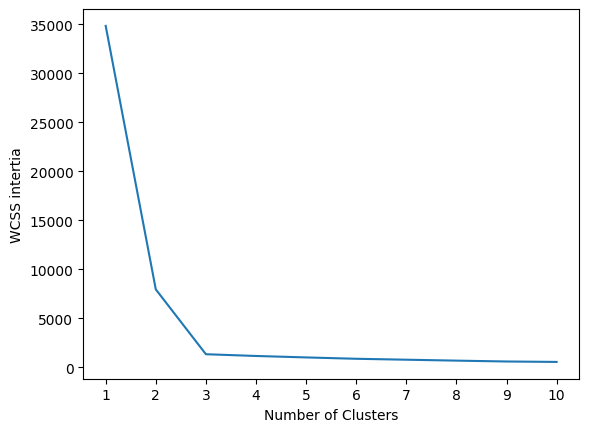

In [ ]:
wcss_inertia=[]
for k in range(1,11):
 kmeans=KMeans(n_clusters=k,init='k-means++')
 kmeans.fit(X_train)
 wcss_inertia.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_inertia)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS intertia')
plt.show()

###Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


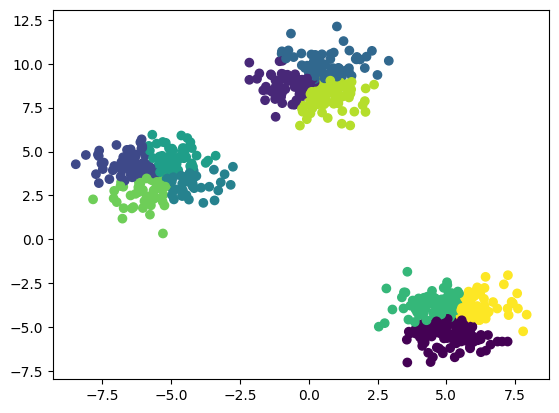

In [ ]:
kmeans=KMeans(n_clusters=k,init='k-means++')
x_pred=kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=x_pred)

#5. K-Means: Knee Locator

In [ ]:
kl=KneeLocator(range(1,11),wcss_inertia,curve='convex',direction='decreasing')
kl.elbow

3

In [ ]:
# Performance metrics
silhouette_coefficients = []
for k in range(2,11):
 kmeans = KMeans(n_clusters=k,init="k-means++")
 kmeans.fit(X_train)
 score=silhouette_score(X_train,kmeans.labels_)
 silhouette_coefficients.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

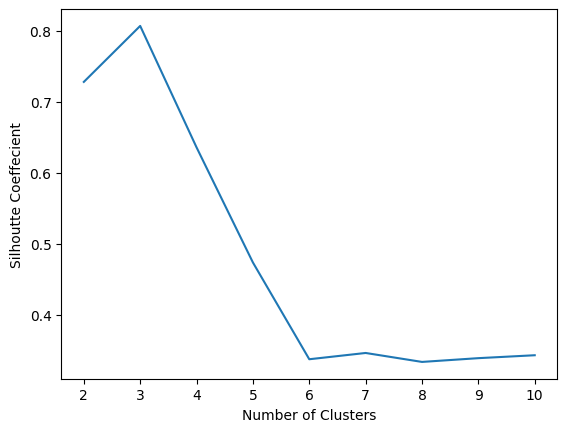

In [ ]:
# Plot silhouette coefficients
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Coeffecient')
plt.show()

#6. Hierarichal Clustering

In [ ]:
# Load data
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)

In [ ]:
X_scaled.shape

(150, 4)

###PCA

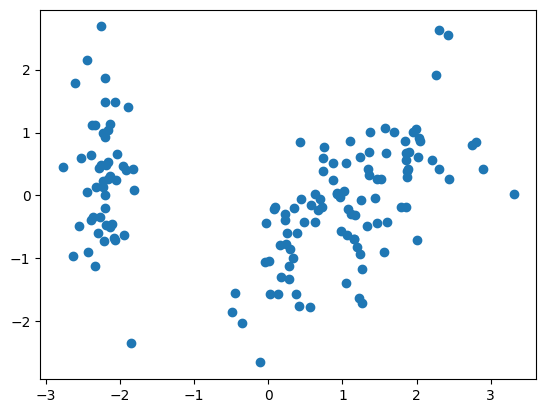

In [ ]:
pca=PCA(n_components=2)
pca
pca_scaled = pca.fit_transform(X_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

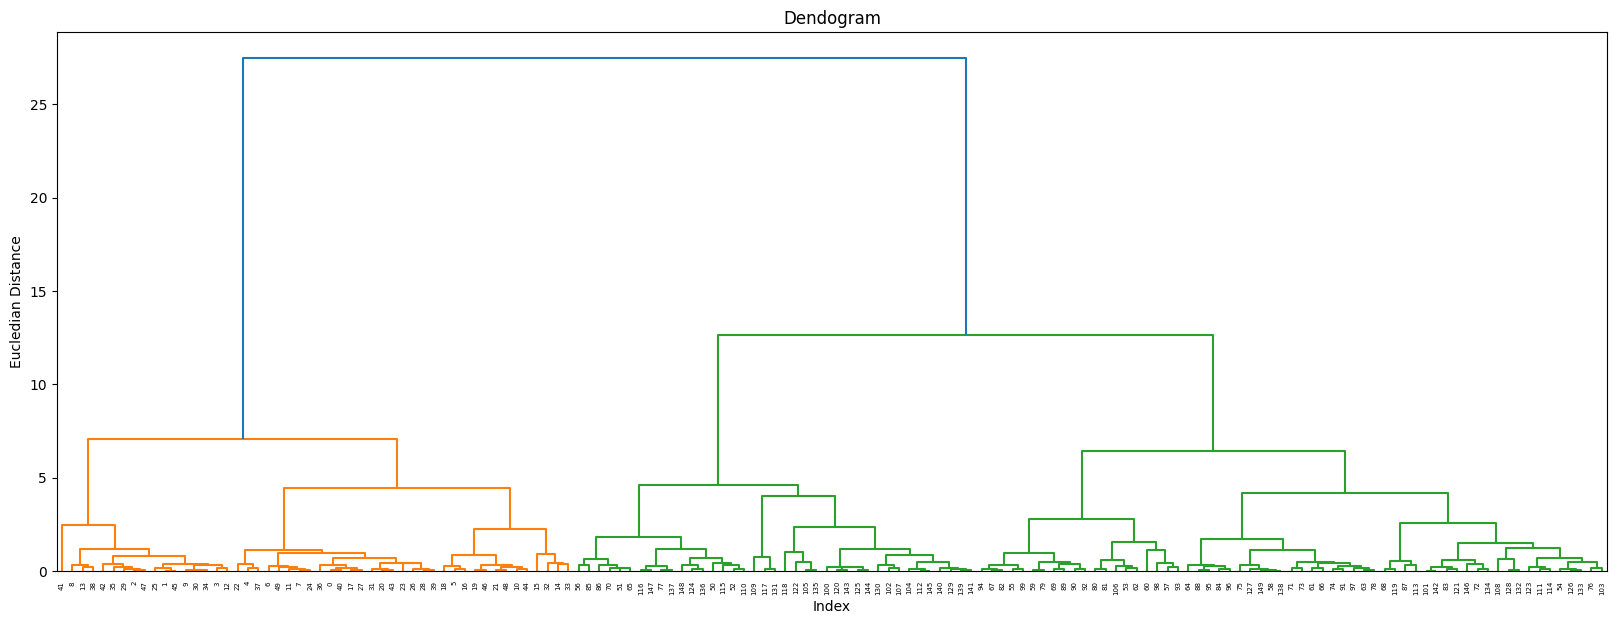

In [ ]:
# Aglomerative Clustering
plt.figure(figsize=(20,7))
plt.title("Dendogram")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Eucledian Distance')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


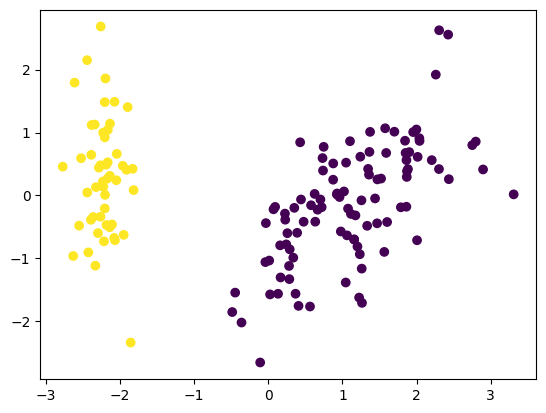

In [ ]:
clust=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
clust.fit(pca_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=clust.labels_)


###DBSCAN Clustering

BSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm in data science and machine learning. Unlike many other clustering algorithms, DBSCAN does not need a pre-specified number of clusters; instead, it infers the number based on the density of the dataset.

The algorithm categorizes data points into three types based on a radius (eps) and a minimum number of points (MinPts):

1. Core points: If there are at least MinPts within the eps radius, the data point is a core point.
2. Border points: If fewer than MinPts are within the eps radius but the data point is within the radius of another core point, it's a border point.
3. Noise points: All other points that do not satisfy the above conditions are considered noise.

DBSCAN has advantages such as discovering arbitrarily shaped clusters and being less sensitive to the initialization. However, it struggles with varying density clusters, high-dimensional data, and the choice of distance measure can significantly affect its performance.

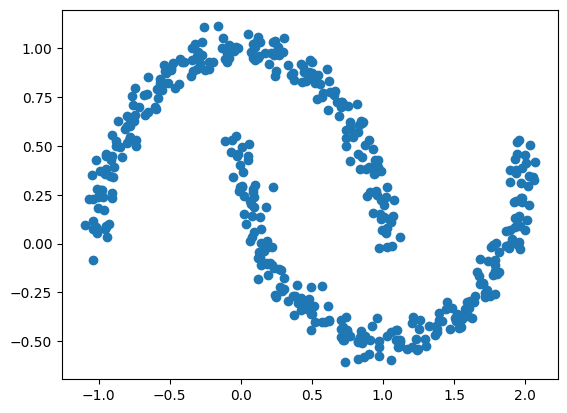

In [ ]:
X,y = make_moons(n_samples=450,noise=0.05)
plt.scatter(X[:,0],X[:,1])


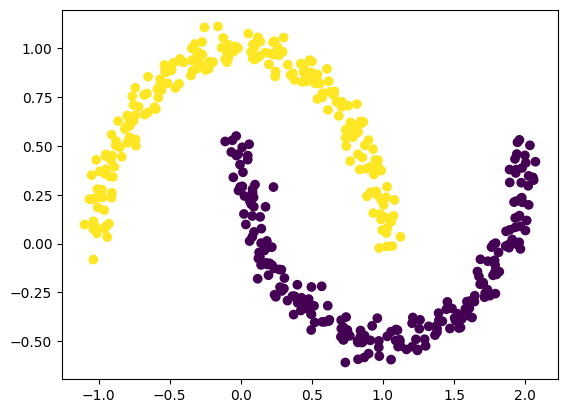

In [ ]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(X)
dbs = DBSCAN(eps=0.5)
dbs.fit(x_scaled)
plt.scatter(X[:,0],X[:,1],c=dbs.labels_)

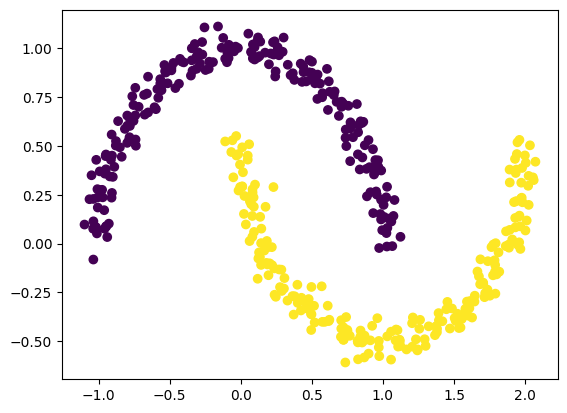

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)